In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in the json filr
with open('../data/results.json', 'r') as f:
    results = list(json.load(f).values())

In [3]:
# convert into pandas dataframe
df = pd.DataFrame.from_dict(results)

In [4]:
# take only server_region and search_terms_result columns
df_new = df[['server_region', 'search_terms_result']]

In [5]:
# function to sum the frequency tables
def sum_results(x):
    output = {}
    for d in x:
        for k, v in d.items():
            output[k] = output.get(k, 0) + v
    return output

In [6]:
# group the search terms by server_region
grouped = df_new.groupby('server_region')['search_terms_result'].apply(lambda x: sum_results(x))

In [7]:
# 'grouped' is a pandas series, convert it to a nested dictionary
grouped_dict = {}
for group_name, group_data in grouped.items():
    if group_name[0] not in grouped_dict:
        grouped_dict[group_name[0]] = {}
    grouped_dict[group_name[0]][group_name[1]] = group_data

In [8]:
# sanity check
grouped_dict.keys()

dict_keys(['California', 'Central and Western', 'District of Columbia', 'England', 'Georgia', 'Missouri', 'New York', 'Ontario', 'Seoul', 'Texas', 'Tokyo', 'Virginia', 'Washington'])

In [9]:
# sanity check
grouped_dict['California']

{'competitive': 22,
 'insecurity': 1,
 'jobless': 0,
 'rejection': 1,
 'unemployment': 1,
 'dismiss': 16,
 'layoff': 7,
 'termination': 0,
 'resignation': 2,
 'downturn': 0,
 'depression': 2,
 'severance': 0,
 'retrench': 0,
 'recind': 0}

In [10]:
# recreate the california results from the dataframe as a test case
california_df = df[df['server_region'] == 'California']
california_search_terms = california_df['search_terms_result'].values
sum_results(california_search_terms)

{'competitive': 22,
 'insecurity': 1,
 'jobless': 0,
 'rejection': 1,
 'unemployment': 1,
 'dismiss': 16,
 'layoff': 7,
 'termination': 0,
 'resignation': 2,
 'downturn': 0,
 'depression': 2,
 'severance': 0,
 'retrench': 0,
 'recind': 0}

In [11]:
grouped_dict['California'] == sum_results(california_search_terms)

True

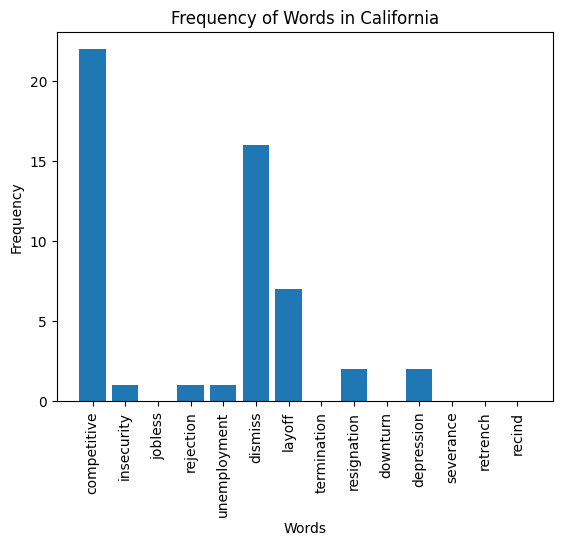

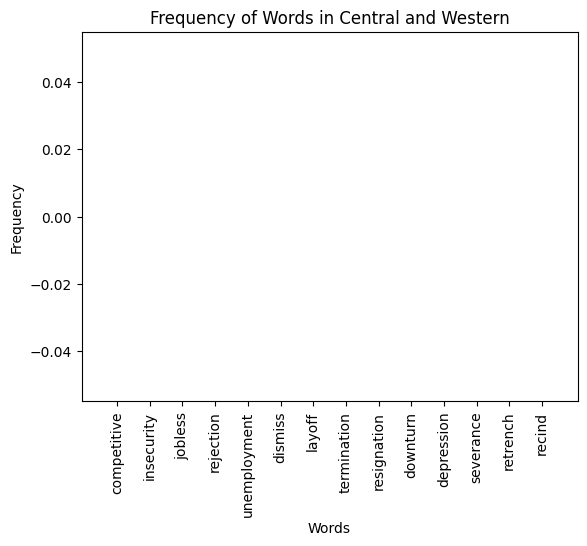

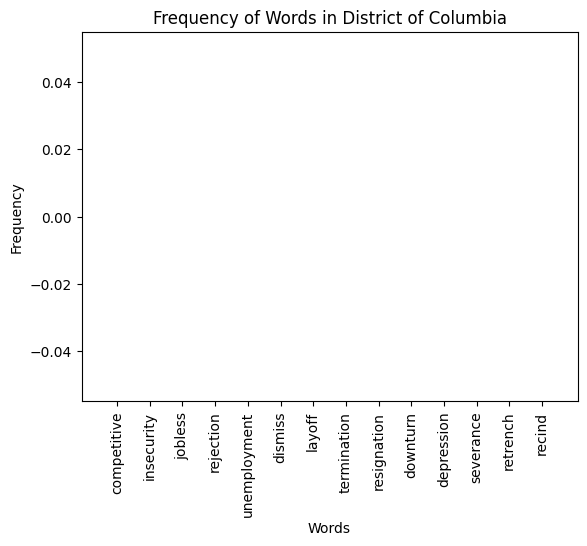

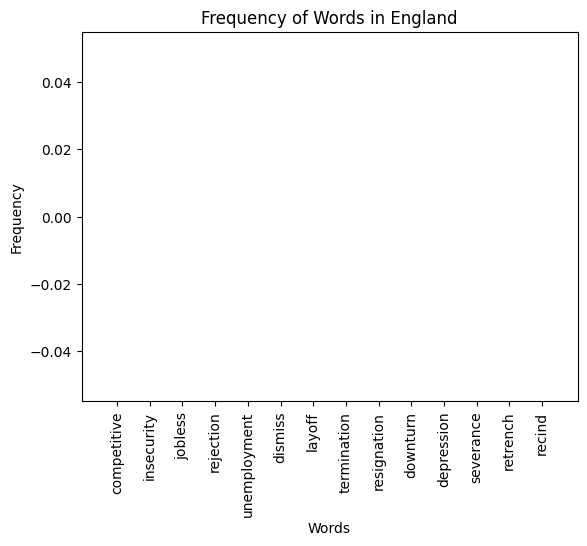

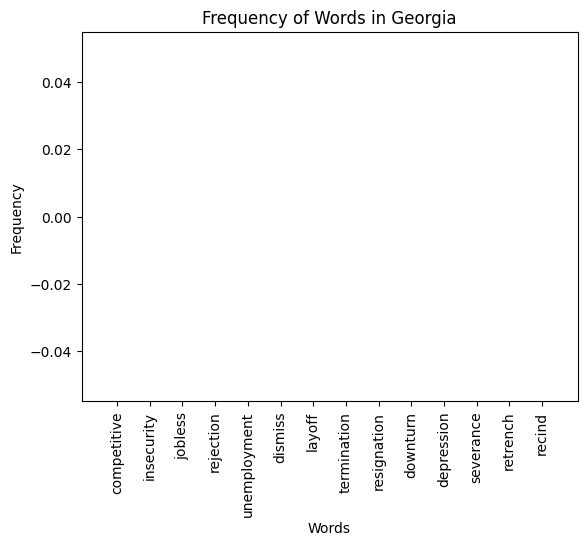

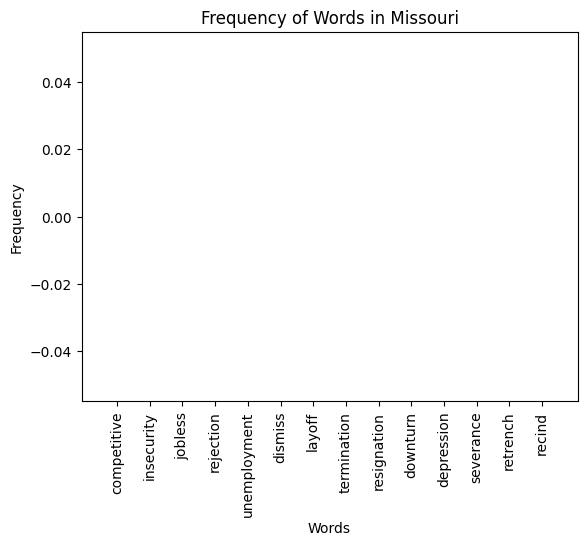

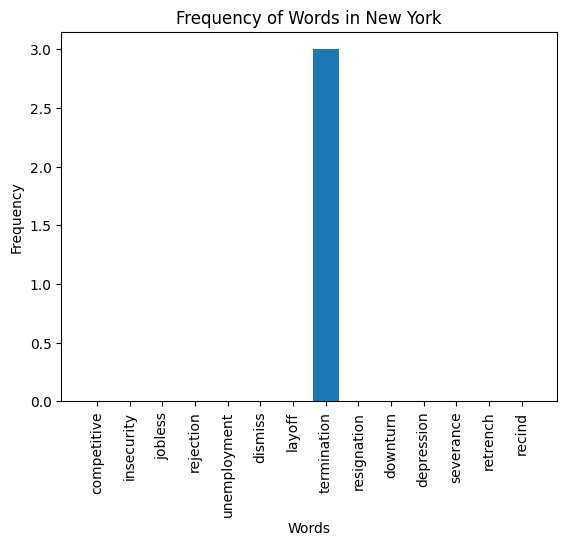

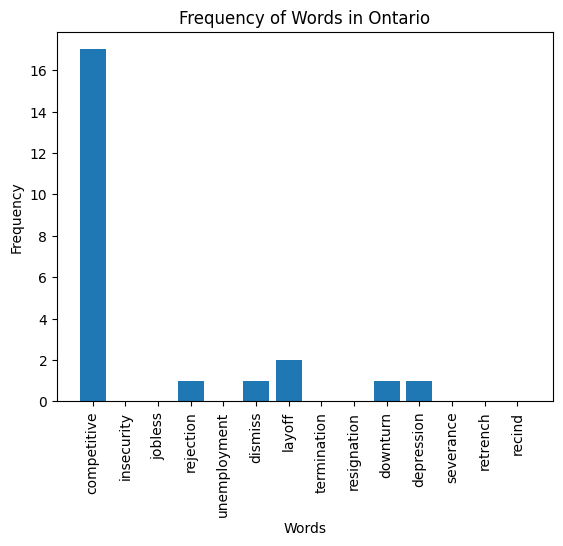

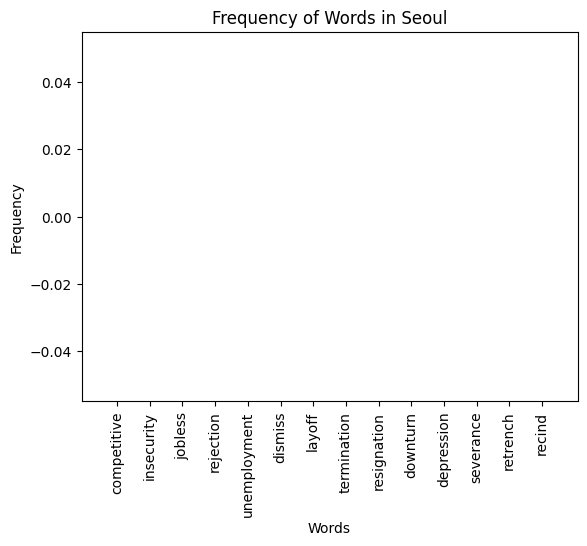

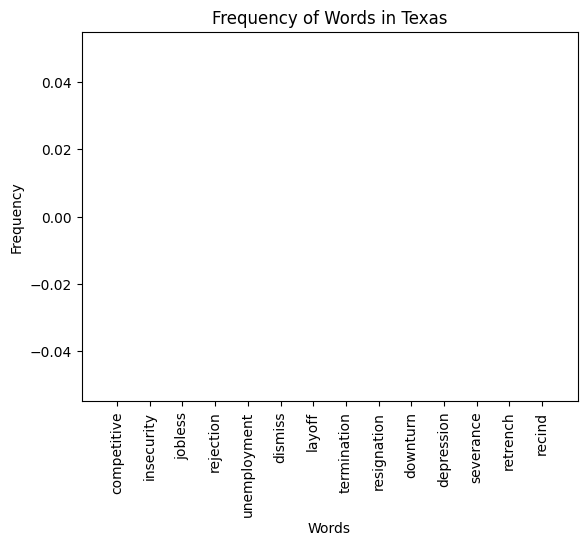

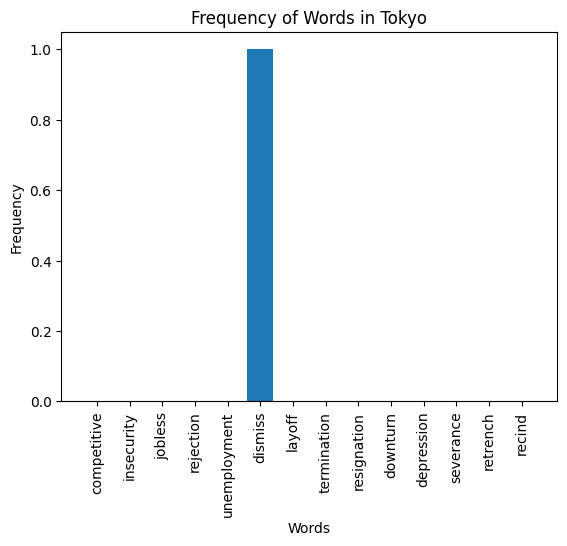

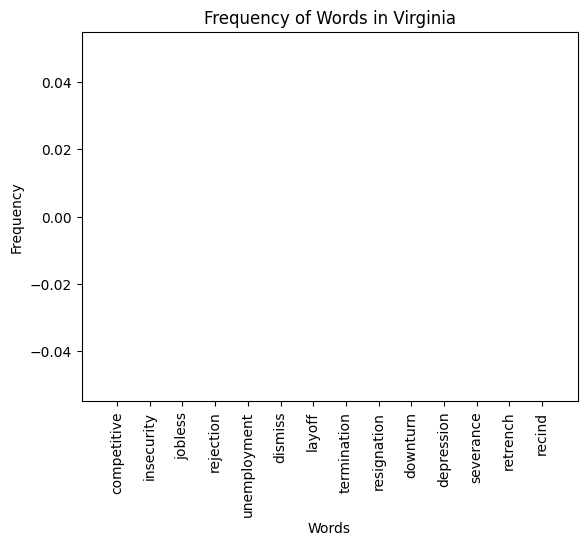

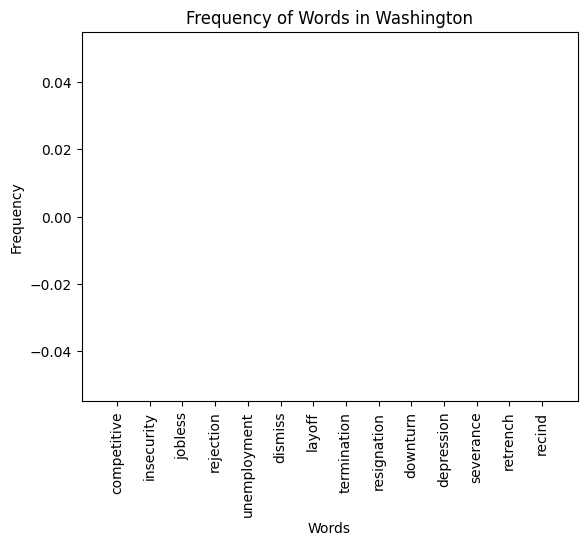

In [12]:
# iterate over each region and plot a bar chart
for region, freq_dict in grouped_dict.items():
    plt.figure()
    plt.bar(freq_dict.keys(), freq_dict.values())
    plt.title(f"Frequency of Words in {region}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    # save the plot as a pdf, fittine the whole image in the page
    plt.savefig(f"../data/figures/frequencies/frequency_of_words_in_{region}.pdf", bbox_inches='tight')

In [13]:
with open('../data/frequencies.json', 'r') as f:
    combined_results = json.load(f)

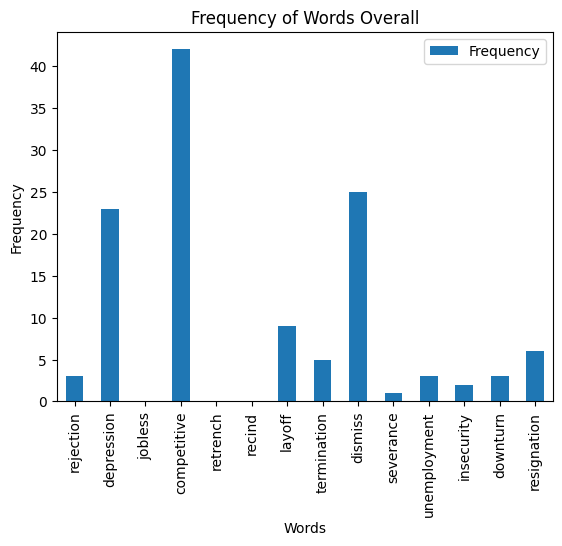

In [14]:
# convert dictionary to pandas dataframe
df = pd.DataFrame.from_dict(combined_results, orient='index', columns=['Frequency'])

# plot the dataframe
df.plot(kind='bar')
plt.title('Frequency of Words Overall')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.savefig('../data/figures/frequencies/frequency_of_words_overall.pdf', bbox_inches='tight')


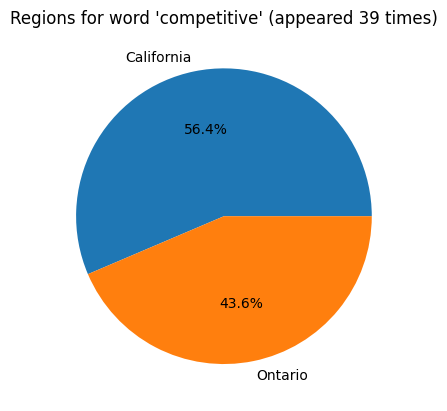

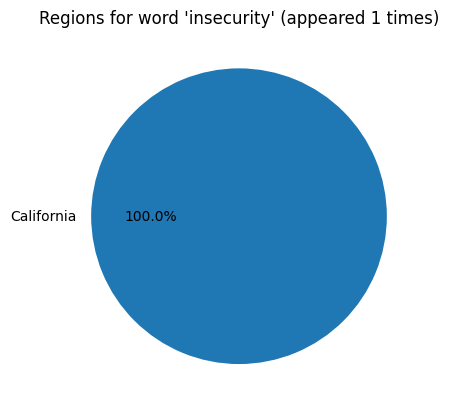

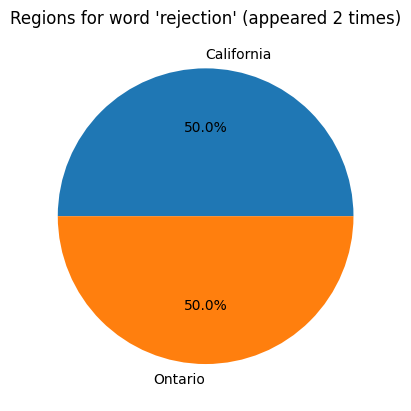

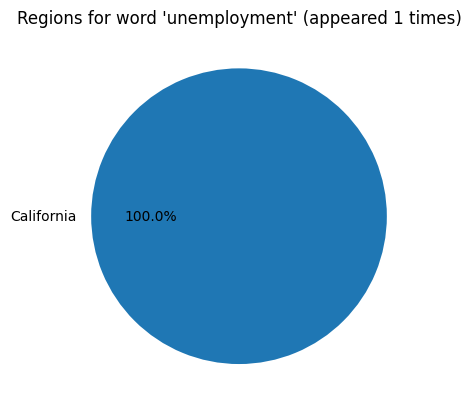

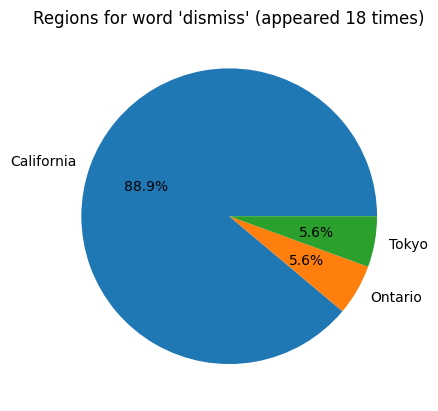

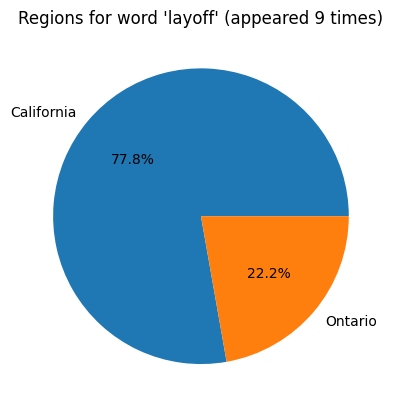

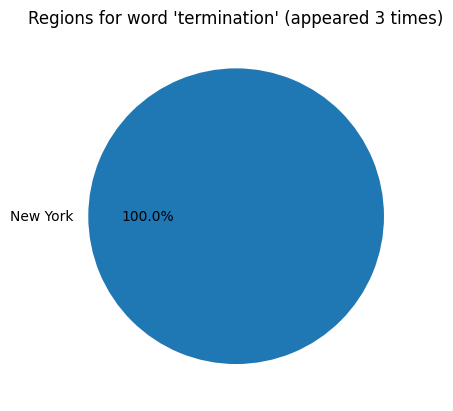

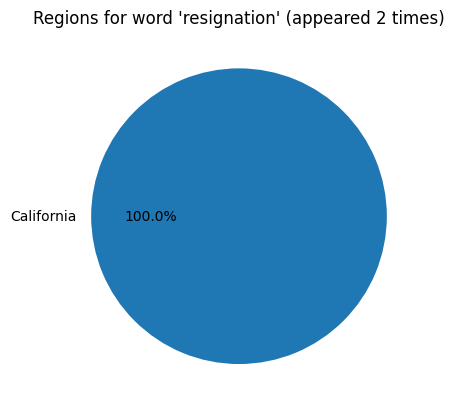

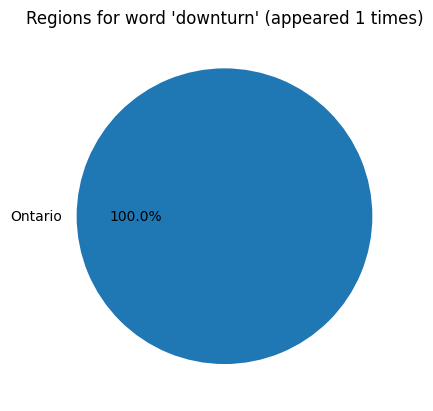

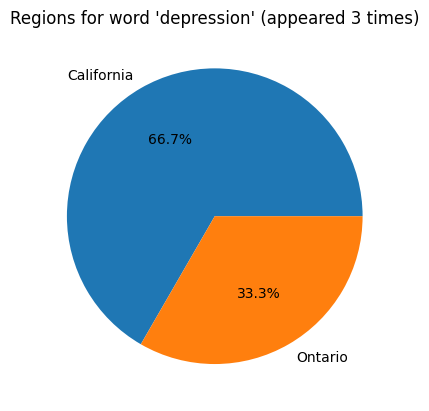

In [15]:
# create a dictionary to store the frequency of each word in each region
word_freq_by_region = {}
for region, freq_dict in grouped_dict.items():
    for word, freq in freq_dict.items():
        if word not in word_freq_by_region:
            word_freq_by_region[word] = {}
        word_freq_by_region[word][region] = freq

# iterate over each word and plot a pie chart
for word, freq_dict in word_freq_by_region.items():
    freq_dict = {k: v for k, v in freq_dict.items() if v != 0}  # remove regions with 0 frequency
    if freq_dict:  # plot only if there is at least one region with non-zero frequency
        plt.figure()
        plt.pie(freq_dict.values(), labels=freq_dict.keys(), autopct='%1.1f%%')
        plt.title(f"Regions for word '{word}' (appeared {sum(freq_dict.values())} times)")
        plt.savefig(f"../data/figures/regions/regions_for_word_{word}.pdf", bbox_inches='tight')
